In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from collections import namedtuple
from IPython.display import display
from pprint import pprint
from circuit_presets import get_wire_combos
from IPython.core.display import display, HTML
from reporting_functions import (
    get_file_content,
    confusion_matrix_stats,
    get_result_table,
    get_result_table_target_pairs,
    gather_results_0_12,
    get_experiment_config,
    get_model_names,
    plot_loss,
    get_line_plot_data,
    plot_119_accuracy_per_structure,
    gather_results_118_135,
    gather_resultdf_1000,
    gather_result_list_1000,
    get_model_result_list,
    get_circuit_diagram,
    get_wire_combos_graph
)
path_experiments = f"{project_home_dir}/experiments"

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

<ipython-input-2-ada13ff87660>:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
from reporting_functions import (
    plot_triangle_accuracies,
    get_result_table_target_pairs,
    gather_results_118_135,
)

exp_id = 1000
result_list = gather_result_list_1000(exp_id, path_experiments=path_experiments)
result_data = gather_resultdf_1000(result_list)
pair_data = get_result_table_target_pairs(
    result_data, "algorithm", "target_pair_str", "accuracy"
)
# figsize = (12, 12)
# plot_data = pair_data.fillna(1)
# plt = plot_triangle_accuracies(
#     plot_data, figsize, title="Accuracy for genre pairs, Classical 9 paramaters"
# )
# plt.savefig("classical_best_10_pair.svg")

In [6]:
print(result_list[0].model_configuration)

Model_Configurations(model_id='b89bc5c0f91c4028aed5f1bdd51b4422', model_type='quantum', algorithm='qcnn', classification_type='binary', embedding_type='Angle', scaler_method='minmax', scaler_param_str='feature_range=[0, 1.5707963267948966]', selection_method='pca', selection_param_str='n_components=8', target_pair=[0, 1], additional_structure=('U_5', 'psatz1', {'n_wires': 8, 'c_step': 7, 'pool_pattern': 'right', 'p_step': 0, 'wire_to_cut': 0}))


In [7]:
result_data

,model_name,model_type,algorithm,classification_type,embedding_type,scaler_method,scaler_param_str,selection_method,selection_param_str,target_pair,...,target_pair_str,mean_test_score,std_test_score,params,accuracy,precision,recall,f1,loss_train_history,model_id
0,b89bc5c0f91c4028aed5f1bdd51b4422,quantum,qcnn,binary,Angle,minmax,"feature_range=[0, 1.5707963267948966]",pca,n_components=8,"[0, 1]",...,0_1,NaN,NaN,NaN,0.915456,1.0,0.065844,0.123552,None,b89bc5c0f91c4028aed5f1bdd51b4422


In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(result_list[0].samples_tfd.y_test, result_list[0].y_test_hat)

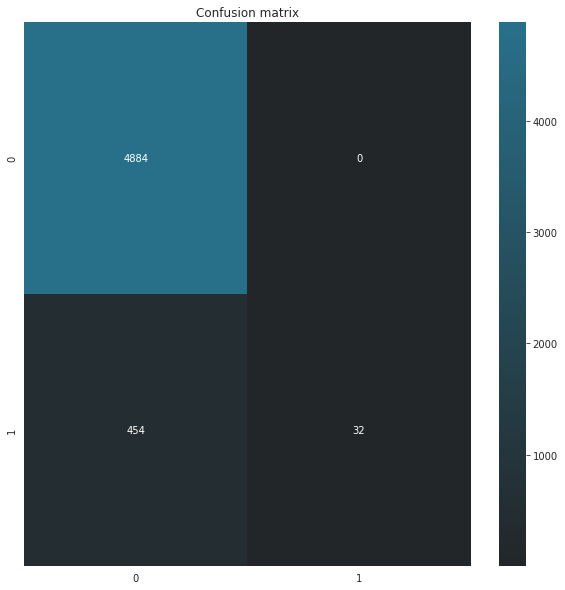

In [45]:
figsize = (10,10)
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=figsize)
    ax.set_title("Confusion matrix")
    sns.heatmap(
        cf_matrix,
        annot=True,
        fmt="0",
        ax=ax,
        vmin=0.3,
        cmap=sns.dark_palette("#28708a", reverse=False, as_cmap=True),
       # mask=mask,
    )

In [50]:
print(classification_report(result_list[0].samples_tfd.y_test, result_list[0].y_test_hat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      4884
           1       1.00      0.07      0.12       486

    accuracy                           0.92      5370
   macro avg       0.96      0.53      0.54      5370
weighted avg       0.92      0.92      0.88      5370

